# Exercises and Homework for week 5

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2022)
Nina Stiesdal & Thomas Erben

Homework is due on **Wednesday, 18/05/2022, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `tar`-archive with name `Homework_5_group_XX.tgz` (replace `XX` with your group number) to your tutor.

**Topics of this exercise:**
 * Two-dimensional `numpy`-arrays
 * Python lists and strings
 * 1D and 2D plots with matplotlib

**Your group number here please:**  Group_05_03

## 1. Lecture Review (0 points)

If you did the lecture review questions [03_Lecture_Review.ipynb](03_Lecture_Review.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

## 2. Plots of vector fields (0 points)
Please study the notebook [04_vector_fields_matplotlib.ipynb](04_vector_fields_matplotlib.ipynb) to plot vector fields with `matplotlib`. You will need it in task 3.

<a id='plate_condensator'></a>
## 3. Electric field of a parallel-plate condensator (15 points)
You learned about the parallel-plate condensator and its electric field in your experimental and theoretical physics classes. To start, you assume that the electric field within the condensator is homegeneous within the condensator:
<img src="figs/condensator_simple.png" style="height: 200px;">

In this exercise, we want to calculate the electric field within a bounded, two-dimensional region. You know from your theoretical physics classes that the electrical field $\vec{E}(x, y)$ within a region, free of charges, can be obtained from the electric potential $\Phi(x, y)$ via $\vec{E}(x, y)=-\nabla\Phi(x, y)$. The electric potential in turn is covered by the two-dimensial Laplace equation:
$$
\Delta \Phi(x, y)=0.
$$
Please have a look at [Wikipedia](https://en.wikipedia.org/wiki/Mathematical_descriptions_of_the_electromagnetic_field) if you would like to fresh up your knowledge on electric fields, Maxwells equations and the like.

The setup for this exercise is as follows:

<img src="figs/condensator_layout.png" style="height: 300px;">

We are given a bounded region as shown above and two condensator plates whose electric potentials are constant at $\Phi=\pm 1$. The potential at the boundary is constant at zero. To justify the latter condition, the condensator plates must be away far enough from the boundaries. For our purposes, the configuration above fulfills this condition. 

Your task is to determine the potential in the interior such that it fulfills the boundary conditions and $\Delta\Phi(x,y)=0$ everywhere else.

### An iteration scheme to solve Laplaces equation with boundary conditions
For our setup, we can numerically solve the equation $\Delta\Phi(x, y)=0$ in a region with boundary conditions as follows:
1. We put a regular, two-dimensional grid of points on our region. Individual points are separated in $x$ and $y$ by $h_x$ and $h_y$ respectively. We will assume henceforth that $h=h_x=h_y$.
2. $$ \Delta\Phi(x, y) = \frac{\partial}{\partial x^2}\Phi(x, y) + \frac{\partial}{\partial y^2}\Phi(x, y).$$
We can numerically approximate the second derivatives via:
$$
\frac{\partial}{\partial x^2}\Phi(x, y) = \frac{\Phi(x+h, y)-2\Phi(x, y)+\Phi(x-h,y)}{h^2} + \cal{O}(h^2)
$$
and similarily
$$ \frac{\partial}{\partial y^2}\Phi(x, y) = \frac{\Phi(x, y+h)-2\Phi(x, y)+\Phi(x,y-h)}{h^2} + \cal{O}(h^2)
$$
With $\Delta\Phi(x, y)=0$, we obtain by neglecting higher-order terms:
$$
\Phi(x, y) = \frac 14(\Phi(x+h, y) + \Phi(x-h, y) + \Phi(x, y+h) + \Phi(x, y-h)).
$$
3. The formulas in (2.) allow us the construction of an iteration scheme:
  1. Set $\Phi_0(x, y)$ to fulfill the boundary conditions and set it equal to zero everywhere else.
  2. Calculate $\Phi_1(x, y) = \frac 14(\Phi_0(x+h, y) + \Phi_0(x-h, y) + \Phi_0(x, y+h) + \Phi_0(x, y-h))$. Hereby, you need to ensure that $\Phi_1(x, y)$ still fulfills the boundary conditions!
  3. Repeat step (2.). i.e. calculate $\Phi_{n+1}(x, y) = \frac 14(\Phi_n(x+h, y) + \Phi_n(x-h, y) + \Phi_n(x, y+h) + \Phi_n(x, y-h))$ until you reach convergence. We want to define convergence via $\max \left|\Phi_{n+1}(x, y) - \Phi_{n}(x, y)\right| < 1.0\cdot 10^{-4}$, where the maximum is taken over all grid-points.

### Your tasks

Please write a program to implement the scheme above and to visualise the electric field of the parallel-plate condensator.

1. Define your two-dimensional coordinate grid as shown above with 101 points in the $x$ and the $y$ dimensions.

   **Note:** 101 points ensure a nice coverage of the interval $[0, 1]$ with points when using `np.linspace(0.0, 1.0, 101)`. To make this clear, consider the lower resolution case with 11 points:
   ```
   a = np.linspace(0.0, 1.0, 11)
   print(a)
   array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])
   ```
2. I placed my condensator plates at $x_{left}=0.35$ and $x_{right}=0.65$. The extent in $y$ is $y_{low} = 0.35$ and $y_{high}=0.65$ but please feel free to experiment with other choices.
3. Implement the iteration scheme above *without* any `for`-loops over the grid points but use `numpy`-slicing instead!
4. Once you have estimated the potential $\Phi(x,y)$, calculate the electric field via $\vec{E}(x, y)=-\nabla\Phi(x, y)$ and visualise it. Please have a look at [this notebook](04_vector_fields_matplotlib.ipynb) to learn some basics on vector-plots with `matplotlib`.

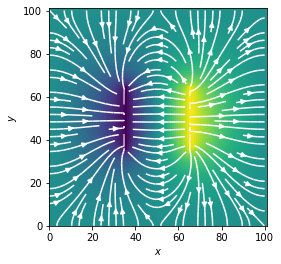

In [17]:
import numpy as np
import matplotlib.pyplot as plt

coordinates = np.linspace(0, 1.0, 101)
X, Y = np.meshgrid(coordinates, coordinates)

Φ = np.zeros((101,101))
h = coordinates[1] - coordinates[0]

def condensator(phi):
    '''set the potential at the condensator plates'''
    phi[35:65,35] = -1
    phi[35:65,65] = 1
    return phi

def iterate(phi):
    '''one iteration step: avaraging over neighbouring values and securing the boundary conditions'''
    
    # cut out the neighbouring values
    left = phi[0:-2, 1:-1]
    right = phi[2:, 1:-1]
    up = phi[1:-1, 0:-2]
    down = phi[1:-1, 2:]
    avarage = 1/4 * (left + right + up + down)
    
    # fill the boundary with zeros
    a = np.zeros((1,99))
    b = np.zeros((101,1))
    avarage = np.append(avarage, a, axis = 0)
    avarage = np.append(a, avarage, axis = 0)
    avarage = np.append(avarage, b, axis = 1)
    avarage = np.append(b, avarage, axis = 1)
    
    # set the potential at the plates to 1 resp. -1
    avarage = condensator(avarage)
    
    return avarage

def approx(phi, err):
    '''approximate the solution of the laplace equation by iterating on phi until the difference between 
    steps becomes smaller than err'''
    a = np.abs(phi - iterate(phi))
    while(np.max(np.abs(phi - iterate(phi))) > err):
        phi = iterate(phi)
    return phi

# approximate solution
phi_a = approx(Φ,1E-4)
# compute the gradient
Ey, Ex = np.gradient(-phi_a, h, h)

# setup the plot
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.pcolormesh(phi_a)
ax.streamplot(100*X, 100*Y, Ex, Ey, color='white', density=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

## 4. Word doubling (15 points)

This task results in a very practical program which you can use when you write your next larger text (thesis, publication etc.).

When writing a text, we often make the mistake to repeat a word.

   ```
   When typing longer texts, we often often make the mistake to
   repeat individual words such as here here.

   ```
   
Write a program which reads a text file and marks positions with such mistakes. You should print lines and linenumbers with double words. Consider also cases where a word doubling occurs directly before and after a line break.

You can find a short example text for test purposes [here](data/double_words.txt).

**Note:**
An obvious ansatz for the problem is to read a line, to split it according to spaces, tabulators and line breaks and to perform the double word test. This, however is no complete solution to the problem! Consider again the above example:

   ```
   ... such as here here.
   ```
   
The double word `here` would not be recognised because the second one is directly followed by a dot (end of sentence mark). There are similar issues with other punctuation marks such as semicolons, parentheses and so on. See the following cell for a possibility to take this into account.

**Example:** The [example text](data/double_words.txt) gives the follwing output with my code:
```
Repetition in line 1. Word "often" at position 6!
Repetition in line 2. Word "here" at position 6!
Repetition of the first word "words" on line 5. It occured at the end of the previous (non-empty) line!
Repetition of the first word "test" on line 9. It occured at the end of the previous (non-empty) line!

```

In [1]:
# example to split a string into words taking into account
# (removing) punctuation.
# For time reasons, we will not treat 'regular expressions' in class
# but you should look them up yourself! You should know them from
# Linux already.

import re # module to handle regular expressions in a Python program

s = "Here some text with double (double!) words words. It also contains puctuation!"

# split s into its words without the punctuation marks; note that
# you might end up with empty strings in the word list!
words = re.split('\W+', s.rstrip())

print(words)

['Here', 'some', 'text', 'with', 'double', 'double', 'words', 'words', 'It', 'also', 'contains', 'puctuation', '']


In [8]:
# importing packages
import re

# importing the .txt file
textfile = open("data/double_words.txt")
lines = textfile.readlines()

# defining a for-loop to loop over all sentences
for i in range(0, len(lines)):
    words = re.split('\W+', lines[i].rstrip()) # extracting words from that line
    
    # defining another for-loop to check to find repeating words
    for n in range(0, len(words)):
        if words[n] == words[n - 1] and words[n] != "":
            print("Repetition in line %d." %(i + 1), "Word \"%s\" at position" % words[n], "%d!" %n)
            
    # checking the last word from line n-1 and first word from line n
    words1 = re.split('\W+', lines[i-1].rstrip())
    if words1[-1] == words[0] and words[0] != "":
        print("Repetition of the first word \"%s\"" %words[0], "on line %d." %(i+1), 
              "It occured at the end of the previous (non-empty) line!")
    
    # lastly checking if the n+1 line has "" and if yes, then check the next line
    if i + 2 < len(lines):
        words1 = re.split('\W+', lines[i+1].rstrip())
        words2 = re.split('\W+', lines[i+2].rstrip())
        if words2[0] == words[-1] and words1[0] == "":
            print("Repetition of the first word \"%s\"" %words[-1], "on line %d." %(i+3), 
              "It occured at the end of the previous (non-empty) line!")          

textfile.close()

Repetition in line 1. Word "often" at position 6!
Repetition in line 2. Word "here" at position 6!
Repetition of the first word "words" on line 5. It occured at the end of the previous (non-empty) line!
Repetition of the first word "test" on line 9. It occured at the end of the previous (non-empty) line!
